In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('688301.SH.csv')
df.drop(df.index[0:6], inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(df.index[3232:3251], inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['seconds'] = (df['DateTime'] - df['DateTime'].min()).dt.total_seconds()
column_order = ['DateTime', 'seconds', 'bid1', 'bsize1', 'bid2', 'bsize2', 'bid3', 'bsize3',
'bid4', 'bsize4', 'bid5', 'bsize5', 'ask1', 'asize1', 'ask2', 'asize2',
'ask3', 'asize3', 'ask4', 'asize4', 'ask5', 'asize5']
df = df[column_order]
df['seconds'][1608:] = df['seconds'][1608:] - 5400
bid1 = np.array(df['bid1']).astype('float64') 
bsize1 = np.array(df['bsize1']).astype('float64')
bid2 = np.array(df['bid2']).astype('float64') 
bsize2 = np.array(df['bsize2']).astype('float64') 
bid3 = np.array(df['bid3']).astype('float64') 
bsize3 = np.array(df['bsize3']).astype('float64') 
bid4 = np.array(df['bid4']).astype('float64') 
bsize4 = np.array(df['bsize4']).astype('float64') 
bid5 = np.array(df['bid5']).astype('float64') 
bsize5 = np.array(df['bsize5']).astype('float64') 
ask1 = np.array(df['ask1']).astype('float64')
asize1 = np.array(df['asize1']).astype('float64') 
ask2 = np.array(df['ask2']).astype('float64')
asize2 = np.array(df['asize2']).astype('float64') 
ask3 = np.array(df['ask3']).astype('float64')
asize3 = np.array(df['asize3']).astype('float64') 
ask4 = np.array(df['ask4']).astype('float64')
asize4 = np.array(df['asize4']).astype('float64') 
ask5 = np.array(df['ask5']).astype('float64')
asize5 = np.array(df['asize5']).astype('float64') 

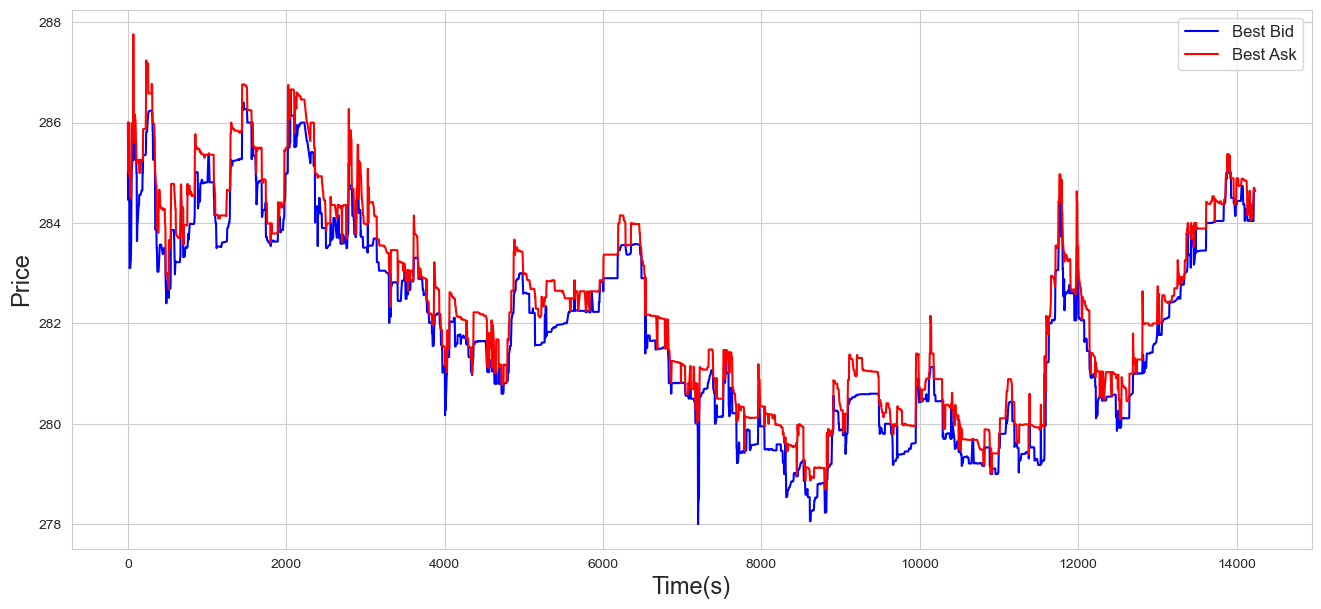

In [5]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'], df['bid1'], c='b', label = 'Best Bid')
plt.plot(df['seconds'], df['ask1'], c='r', label = 'Best Ask')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Price', size=17)
plt.legend(loc=1, fontsize='large')

(0.0, 1500.0)

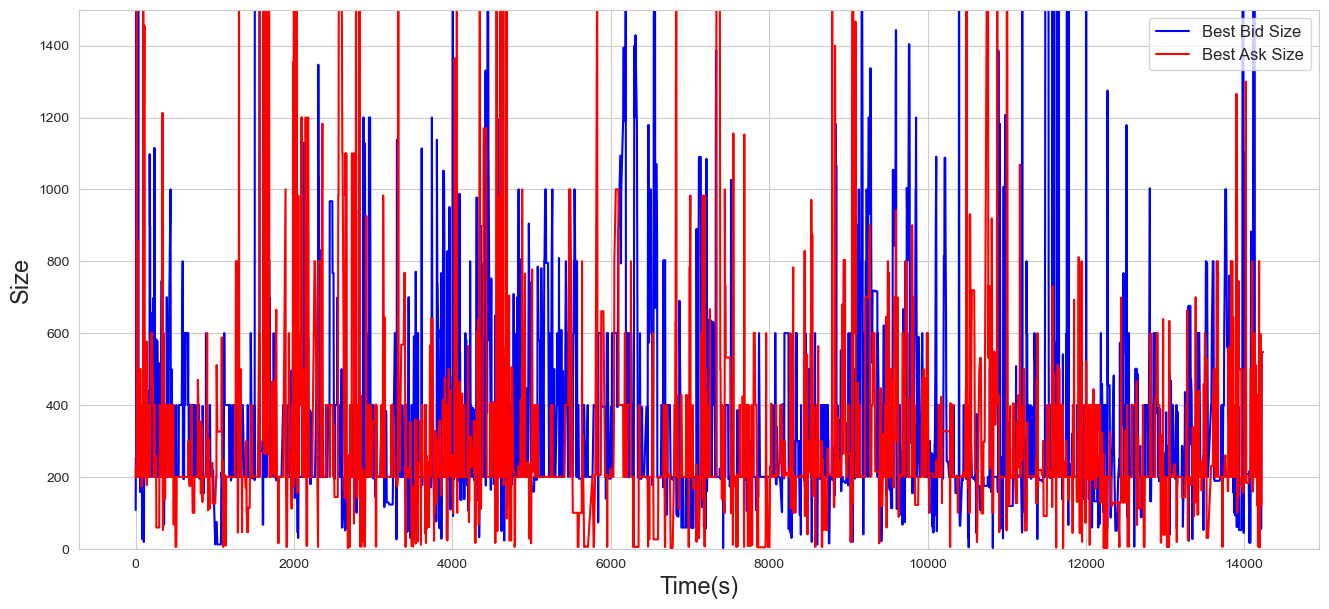

In [6]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'], df['bsize1'], c='b', label = 'Best Bid Size')
plt.plot(df['seconds'], df['asize1'], c='r', label = 'Best Ask Size')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Size', size=17)
plt.legend(loc=1, fontsize='large')
plt.ylim(0,1500)

In [7]:
def weighted_features(w1, w2, w3, w4, w5, bsize1, bsize2, bsize3, bsize4, bsize5, asize1, asize2, asize3,\
                     asize4, asize5):
    weighted_bid = w1 * bsize1 + w2 * bsize2 + w3 * bsize3 + w4 * bsize4 + w5 * bsize5
    weighted_ask = w1 * asize1 + w2 * asize2 + w3 * asize3 + w4 * asize4 + w5 * asize5
    
    weighted_depth = weighted_bid / weighted_ask 
    weighted_obi = (weighted_bid - weighted_ask) / (weighted_bid + weighted_ask)
   
    weighted_depth = np.nan_to_num(weighted_depth)
    weighted_obi = np.nan_to_num(weighted_obi)
    
    return weighted_depth, weighted_obi

In [8]:
w_d_81100, w_i_81100 = weighted_features(80.0, 10.0, 10.0, 0.0, 0.0, bsize1, bsize2, bsize3, bsize4, bsize5, asize1, asize2, asize3,asize4, asize5)
w_d_73000, w_i_73000 = weighted_features(70.0, 30.0, 0.0, 0.0, 0.0, bsize1, bsize2, bsize3, bsize4, bsize5, asize1, asize2, asize3,asize4, asize5)
w_d_72100, w_i_72100 = weighted_features(70.0, 20.0, 10.0, 0.0, 0.0, bsize1, bsize2, bsize3, bsize4, bsize5, asize1, asize2, asize3,asize4, asize5)
w_d_52111, w_i_52111 = weighted_features(50.0, 20.0, 20.0, 10.0, 0.0, bsize1, bsize2, bsize3, bsize4, bsize5, asize1, asize2, asize3,asize4, asize5)

(0.0, 15.0)

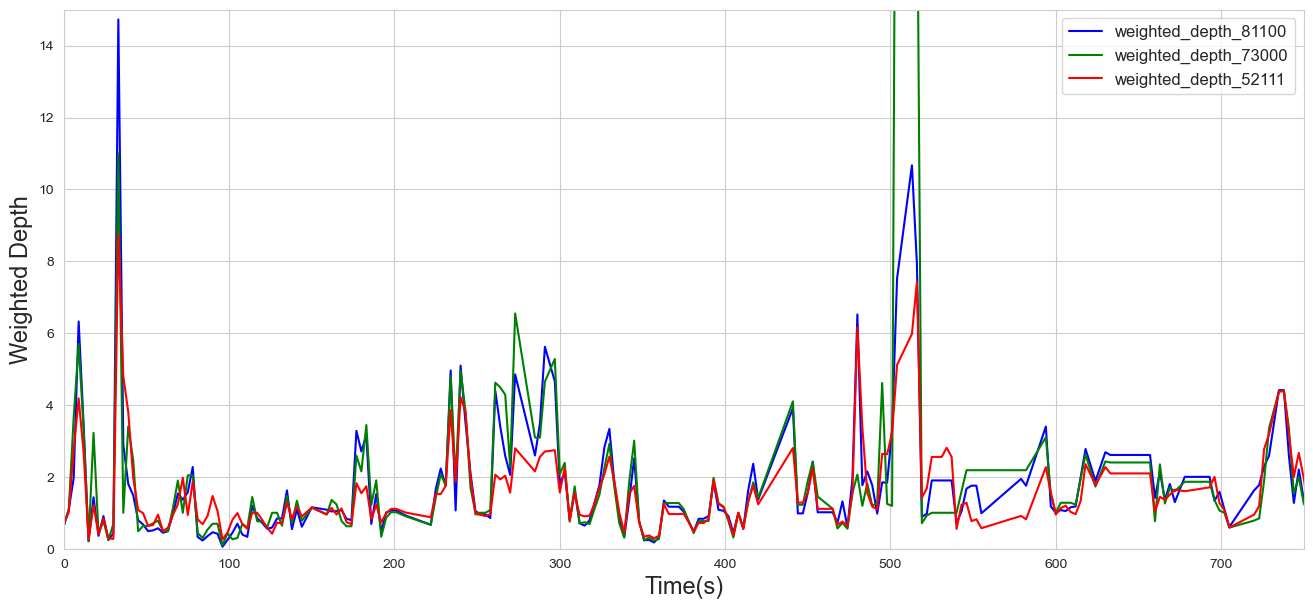

In [20]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'][:200],w_d_81100[:200], c= 'b', label = 'weighted_depth_81100')
plt.plot(df['seconds'][:200],w_d_73000[:200], c= 'g', label = 'weighted_depth_73000')
plt.plot(df['seconds'][:200],w_d_52111[:200], c= 'r', label = 'weighted_depth_52111')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Weighted Depth', size=17)
plt.legend(loc=1, fontsize='large')
plt.xlim(0,750)
plt.ylim(0,15)

(0.0, 750.0)

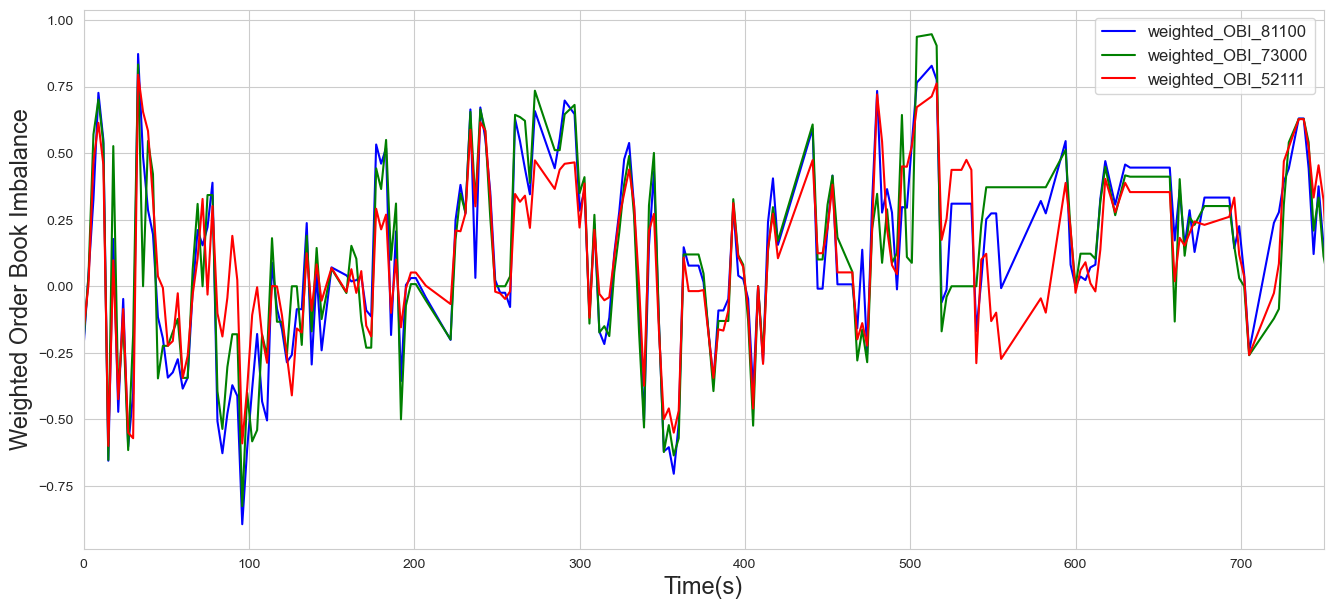

In [21]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'][:200],w_i_81100[:200], c= 'b', label = 'weighted_OBI_81100')
plt.plot(df['seconds'][:200],w_i_73000[:200], c= 'g', label = 'weighted_OBI_73000')
plt.plot(df['seconds'][:200],w_i_52111[:200], c= 'r', label = 'weighted_OBI_52111')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Weighted Order Book Imbalance', size=17)
plt.legend(loc=1, fontsize='large')
plt.xlim(0,750)

In [11]:
def rise_ratio(ask1, seconds, before_time): # timestamp_time_second is literally of the time stamps while before time is the point in which to add 
    ask1[ask1 == 0] = np.mean(ask1)
    index = np.where(seconds >= before_time)[0][0]
    rise_ratio = []

    for i in range(0, index):
        rise = round((ask1[i] - ask1[0])*(1.0)/ask1[0]*100, 5)
        rise_ratio.append(rise)
        
    for i in range(index, len(ask1)):
        #print(f"Length of df[:{i}]: {len(df[:i])}")
        index_start = np.where(seconds[:i] >= seconds[i] - before_time)[0][0]
        rise = round((ask1[i] - ask1[index_start])*(1.0)/ask1[index_start]*100,5)
        rise_ratio.append(rise)
    
    return rise_ratio

In [12]:
before_time = 60.0 * 3 + 30
rise_ask_2 = rise_ratio(ask1, df['seconds'], before_time)
before_time = 60.0 * 12 + 30
rise_ask_20 = rise_ratio(ask1, df['seconds'], before_time)
before_time = 60.0 * 18 + 30
rise_ask_32 = rise_ratio(ask1, df['seconds'], before_time)

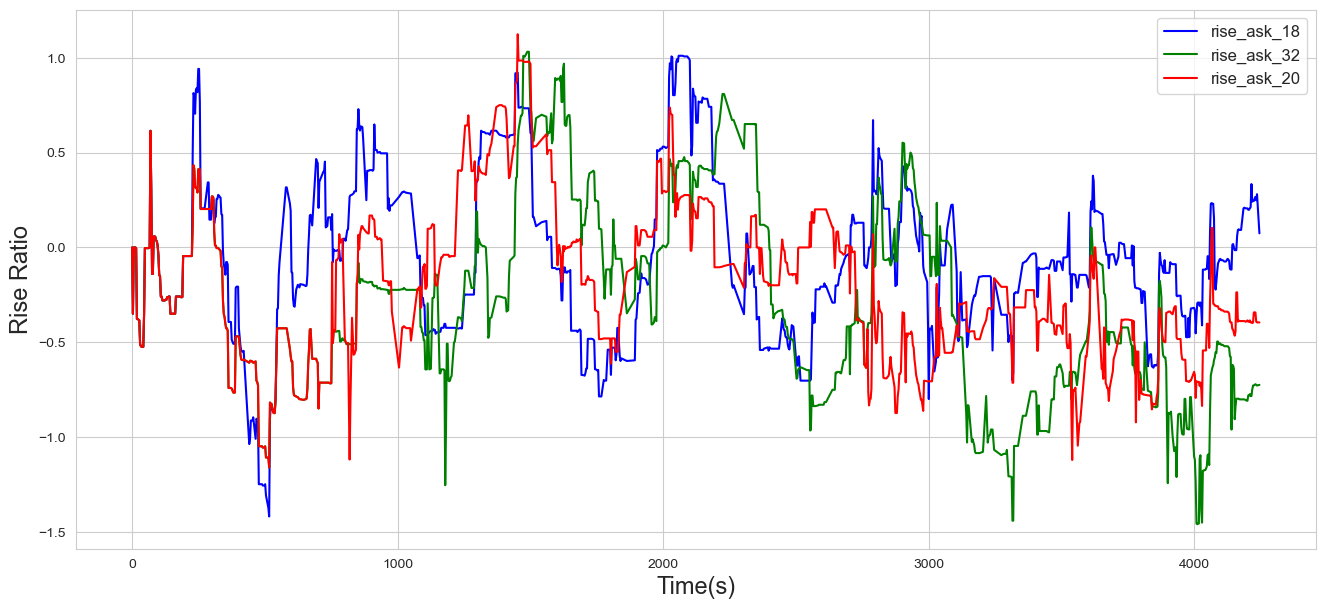

In [13]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'][:1000],rise_ask_2[:1000], c= 'b', label = 'rise_ask_18')
plt.plot(df['seconds'][:1000],rise_ask_32[:1000], c= 'g', label = 'rise_ask_32')
plt.plot(df['seconds'][:1000],rise_ask_20[:1000], c= 'r', label = 'rise_ask_20')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Rise Ratio', size=17)
plt.legend(loc=1, fontsize='large')

In [14]:
def vwap(bid1, bsize1, bid2, bsize2, bid3, bsize3, ask1, asize1, ask2, asize2, ask3, asize3):
    
    vwap_3 = (bid1 * bsize1 + bid2 * bsize2 + bid3 * bsize3 + ask1 * asize1 + ask2 * asize2 + ask3 * asize3) / (bsize1 + bsize2 + bsize3 + asize1 + asize2 + asize3)
    vwap_2 = (bid1 * bsize1 + bid2 * bsize2 + ask1 * asize1 + ask2 * asize2) / (bsize1 + bsize2 + asize1 + asize2)
    vwap_1 = (bid1 * bsize1 + ask1 * asize1) / (bsize1 + asize1)
    
    return vwap_1, vwap_2, vwap_3

In [15]:
vwap_1, vwap_2, vwap_3 = vwap(bid1, bsize1, bid2, bsize2, bid3, bsize3, ask1, asize1, ask2, asize2, ask3, asize3)

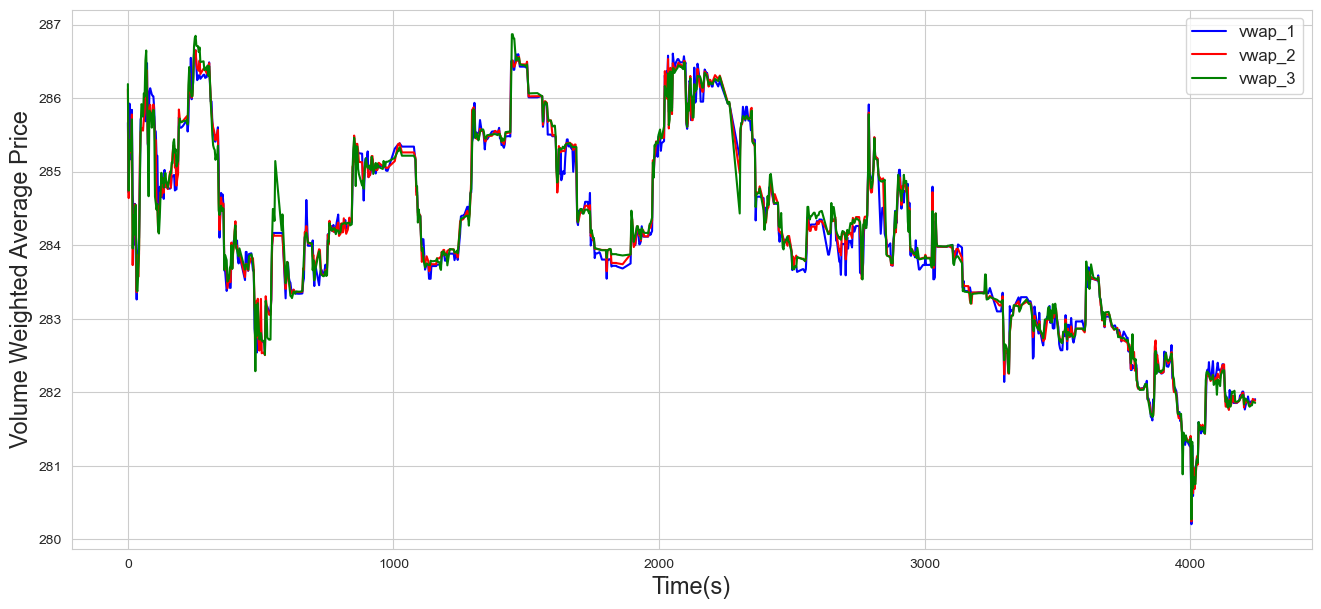

In [18]:
plt.figure(figsize = (16,7))
plt.plot(df['seconds'][:1000],vwap_1[:1000], c= 'b', label = 'vwap_1')
plt.plot(df['seconds'][:1000],vwap_2[:1000], c= 'r', label = 'vwap_2')
plt.plot(df['seconds'][:1000],vwap_3[:1000], c= 'g', label = 'vwap_3')
plt.xlabel('Time(s)', size=17)
plt.ylabel('Volume Weighted Average Price', size=17)
plt.legend(loc=1, fontsize='large')